# Data_Exploration / Exploració_de_Dades
![sierra5](images/sierra/sierra5.png)
S03_T05

## Exercici_1
---

In [27]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

delay = pd.read_csv('AirDelay/DelayedFlights.csv')

delay.drop(delay.columns[delay.columns.str.contains('unnamed', case=False)], axis=1,
          inplace=True)

delay[::250000]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.00,1955,2211.00,2225,WN,335,...,4.00,8.00,0,N,0,NaN,NaN,NaN,NaN,NaN
250000,2008,2,21,4,1843.00,1821,1954.00,1933,OO,5704,...,4.00,8.00,0,N,0,21.00,0.00,0.00,0.00,0.00
500000,2008,3,4,2,1235.00,1205,1533.00,1500,MQ,3387,...,3.00,18.00,0,N,0,0.00,0.00,3.00,0.00,30.00
750000,2008,5,22,4,1135.00,1105,1301.00,1230,WN,720,...,5.00,15.00,0,N,0,6.00,0.00,1.00,0.00,24.00
1000000,2008,6,8,7,35.00,2305,205.00,46,FL,77,...,5.00,8.00,0,N,0,0.00,0.00,0.00,0.00,79.00
1250000,2008,7,23,3,2203.00,2110,2251.00,2221,CO,597,...,7.00,14.00,0,N,0,0.00,0.00,0.00,0.00,30.00
1500000,2008,9,1,1,1927.00,1910,2117.00,2106,OH,6570,...,9.00,51.00,0,N,0,NaN,NaN,NaN,NaN,NaN
1750000,2008,12,18,4,2128.00,1940,108.00,2310,WN,208,...,36.00,11.00,0,N,0,10.00,0.00,10.00,0.00,98.00


In [28]:
# Listado de columnas
columns_names = list(delay.columns.values)
print(columns_names)

['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']


In [29]:
# Añadiendo columnas
df = pd.DataFrame(delay, columns=['Month','DayOfWeek','DayWeek','CRSDepTime','DepTime','DepDelay',
                                  'CRSArrTime','ArrTime','ArrDelay','RetrasosArr', 'UniqueCarrier',
                                  'AirTime','Distance','Velocidad'])

# Column: True = Retraso, False = NoRetraso
arrDelay = df['ArrTime'] - df['CRSArrTime']
df['RetrasosArr'] = arrDelay > 0

# Column: Velocidad = D/T
Distancia, Tiempo = df['Distance'], df['AirTime']

Velocidad = Distancia/Tiempo # Velocidad
df['Velocidad'] = Velocidad

# Column: Nombres de la semana 'DayWeek'
dayweek = df['DayOfWeek'].replace({1: 'Lunes', 2: 'Martes', 3: 'Miércoles',
            4: 'Jueves', 5: 'Viernes', 6: 'Sábado', 7: 'Domingo'})
df['DayWeek'] = dayweek

df[::275000]

,Month,DayOfWeek,DayWeek,CRSDepTime,DepTime,DepDelay,CRSArrTime,ArrTime,ArrDelay,RetrasosArr,UniqueCarrier,AirTime,Distance,Velocidad
0,1,4,Jueves,1955,2003.00,8.00,2225,2211.00,-14.00,False,WN,116.00,810,6.98
275000,2,7,Domingo,1300,1309.00,9.00,1729,1750.00,21.00,True,US,174.00,1474,8.47
550000,3,4,Jueves,1955,2038.00,43.00,2141,2222.00,41.00,True,AS,83.00,605,7.29
825000,5,6,Sábado,1205,1249.00,44.00,1505,1541.00,36.00,True,MQ,95.00,772,8.13
1100000,7,7,Domingo,2125,2211.00,46.00,2340,19.00,39.00,False,WN,109.00,787,7.22
1375000,8,7,Domingo,1120,1142.00,22.00,1335,1340.00,5.00,True,MQ,103.00,810,7.86
1650000,11,1,Lunes,1534,1623.00,49.00,1859,2002.00,63.00,True,XE,118.00,872,7.39
1925000,12,2,Martes,1400,1412.00,12.00,1555,1559.00,4.00,True,CO,79.00,529,6.70


## Exercici_2
---

In [30]:
# Descriptive statistics

# FORMAT
pd.set_option('float_format', '{:.2f}'.format)

# DESCRIBE
df.describe()

,Month,DayOfWeek,CRSDepTime,DepTime,DepDelay,CRSArrTime,ArrTime,ArrDelay,AirTime,Distance,Velocidad
count,1936758.00,1936758.00,1936758.00,1936758.00,1936758.00,1936758.00,1929648.00,1928371.00,1928371.00,1936758.00,1928371.00
mean,6.11,3.98,1467.47,1518.53,43.19,1634.22,1610.14,42.20,108.28,765.69,inf
std,3.48,2.00,424.77,450.49,53.40,464.63,548.18,56.78,68.64,574.48,NaN
min,1.00,1.00,0.00,1.00,6.00,0.00,1.00,-109.00,0.00,11.00,0.35
25%,3.00,2.00,1135.00,1203.00,12.00,1325.00,1316.00,9.00,58.00,338.00,5.86
50%,6.00,4.00,1510.00,1545.00,24.00,1705.00,1715.00,24.00,90.00,606.00,6.73
75%,9.00,6.00,1815.00,1900.00,53.00,2014.00,2030.00,56.00,137.00,998.00,7.47
max,12.00,7.00,2359.00,2400.00,2467.00,2400.00,2400.00,2461.00,1091.00,4962.00,inf


In [31]:
# Missing values

# COUNT MISSING VALUES
df.isnull().sum().sort_values(ascending=False)
# FILL MISSING VALUES
df.fillna(method='ffill', inplace=True)
# COUNT MISSING VALUES
df.isnull().sum()

Month            0
DayOfWeek        0
DayWeek          0
CRSDepTime       0
DepTime          0
DepDelay         0
CRSArrTime       0
ArrTime          0
ArrDelay         0
RetrasosArr      0
UniqueCarrier    0
AirTime          0
Distance         0
Velocidad        0
dtype: int64

### MARKET SHARE

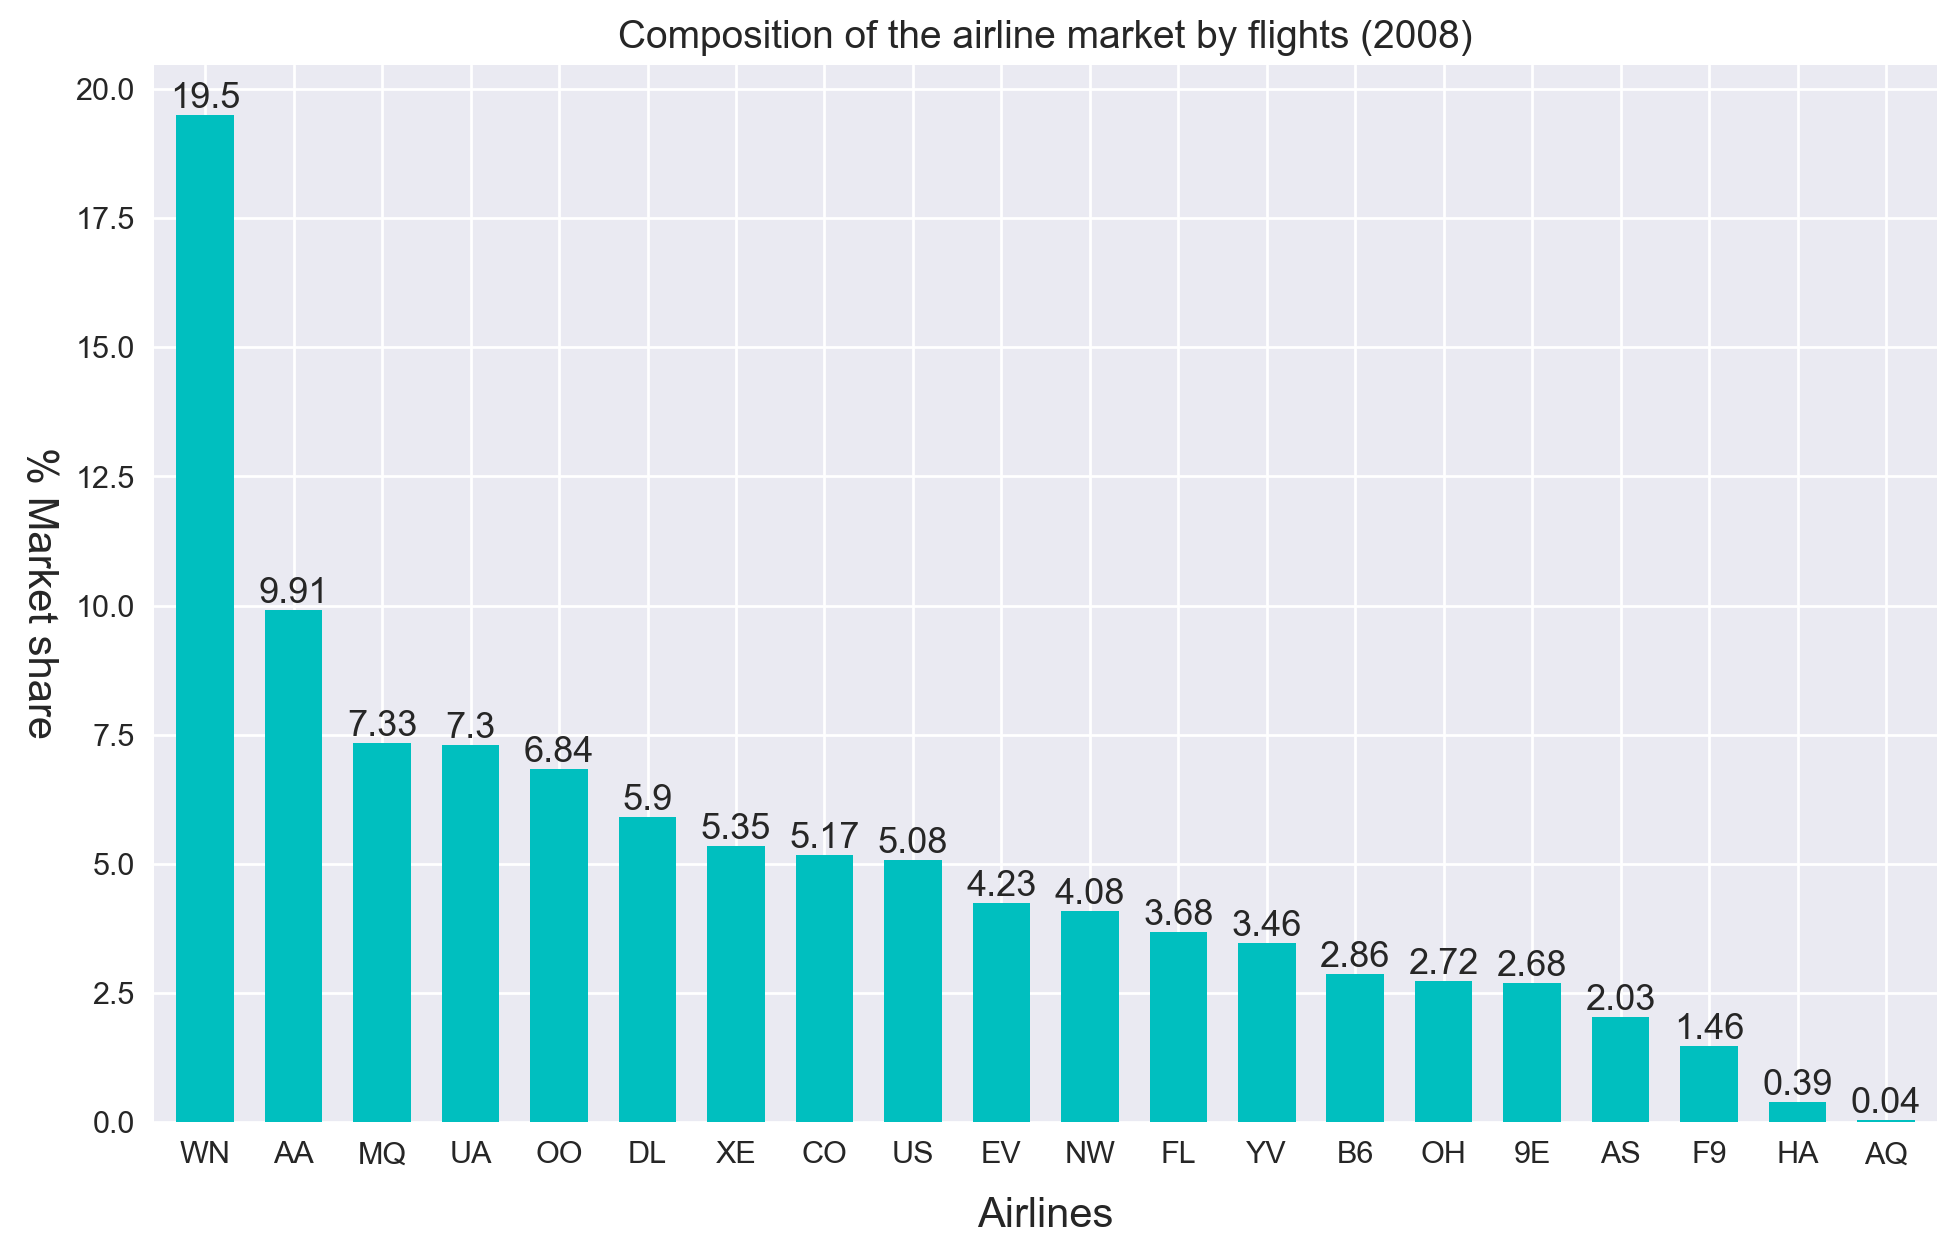

In [32]:
# MARKET SHARE

# Variables
airnames=df['UniqueCarrier'].value_counts().index.tolist()
market = round((df['UniqueCarrier'].value_counts()/df['UniqueCarrier'].value_counts().sum())*100,2)

#PlotStyle
plt.style.use('seaborn')

### Figure
fig = plt.figure(figsize =(11.5, 7))
fig.set_dpi(200)

# Plot
market.plot.bar(fontsize = 11, width=0.65, color = ('c'))

### Customize Plot
plt.title('Composition of the airline market by flights (2008)', fontsize=14)
plt.xlabel('Airlines', fontsize=15, labelpad=10)
plt.ylabel('% Market share', fontsize=15, rotation=-90, labelpad=20)
plt.xticks(rotation=0)
# annotation
for m in range(len(market)):
    plt.annotate(str(market[m]), xy=(m, market[m]), ha='center', va='bottom', size=13);

#fig.savefig('test.png')

Podemos observar en el gráfico que la empresa **Southwest (WN)** con diferencia es la aerolínea con mas porcentaje de mercado.
  
  Esto indica que Southwest tiene más vuelos por día que cualquier otra aerolinea estadounidense.
  
  **·** Es cierto que 'WN' tiene una mayor flota de aviones por lo que puede ofrece una mayor cantidad de vuelos a precios mas reducidos que sus competidores: Esto explica la cuota de mercado por vuelos. Aunque, 'WN' tine una cuota de mercado cercana 20%, no implica una mayor facturación que sus competidores mas cercanos.  La diferencia de precio de las distintas aerolineas podrían alterar la distribución de la cuota de mercado según facturación.
  
  **·** La dominancia del mercado (por vuelos) se concentra principalmente en las 5 primeras aerolíneas con más cuota. Para entender la profundidad y la dominancia de las 5 primeras aerolínias observamos el cúmulo de las 15 aerolineas restantes: Las últimas **15 aerolineas representan el 49.13% de la cuota de mercado**. Frente al **50.87% de cuota de mercado de las 5 primeras aerolíneas.** Para superar el 50% de la cuota de mercado como mínimo se necesitan las últimas 16 aerolíneas: Las 16 últimas aerolíneas representan el 55.96% de la cuota de mercado.

| Aeorolínea | %Cuota de mercado |
| -- | -- |
| 5 Primeras aerolíneas | 50.87 % |
| 15 Últimas aerolíneas | 49.13 % |
| Total | 100 % |


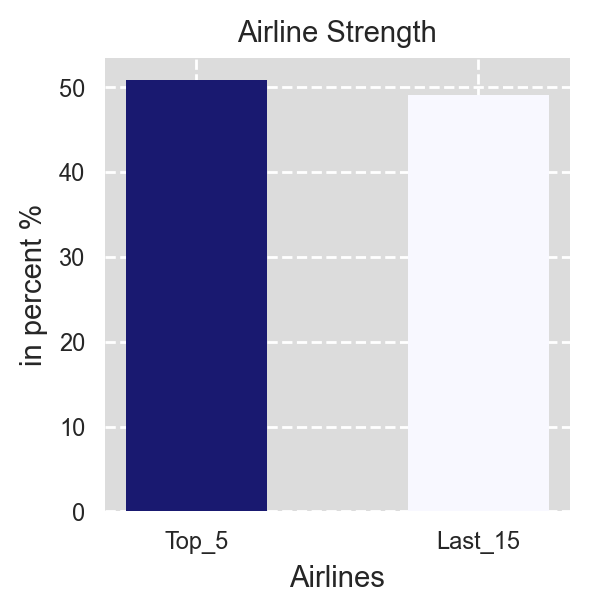

In [33]:
# Market Dominance

# Variables
total=df['UniqueCarrier'].value_counts().sum()
top5 = round(df['UniqueCarrier'].value_counts()[:5].sum()/total*100, 2)
last15 = round(df['UniqueCarrier'].value_counts()[5:].sum()/total*100, 2)

### Figure
fig, ax  = plt.subplots(figsize=(3,3), dpi=200)
# Plot
ax.bar([1, 2], [top5, last15], width=0.5,
       tick_label=['Top_5', 'Last_15'], align='center', color=('midnightblue','ghostwhite'))

### Customize
ax.set_title('Airline Strength', size=10.5)
ax.set_xlabel('Airlines', size=10.5)
ax.set_ylabel('in percent %', size=10.5)
ax.tick_params(axis='both', which='major', labelsize=8.5)

# Background: grid, facecolor
ax.grid(b=True, which='both', axis='both', color='w', linestyle='--')
ax.set_facecolor('gainsboro')

plt.show()

### FLIGHTS DELAY

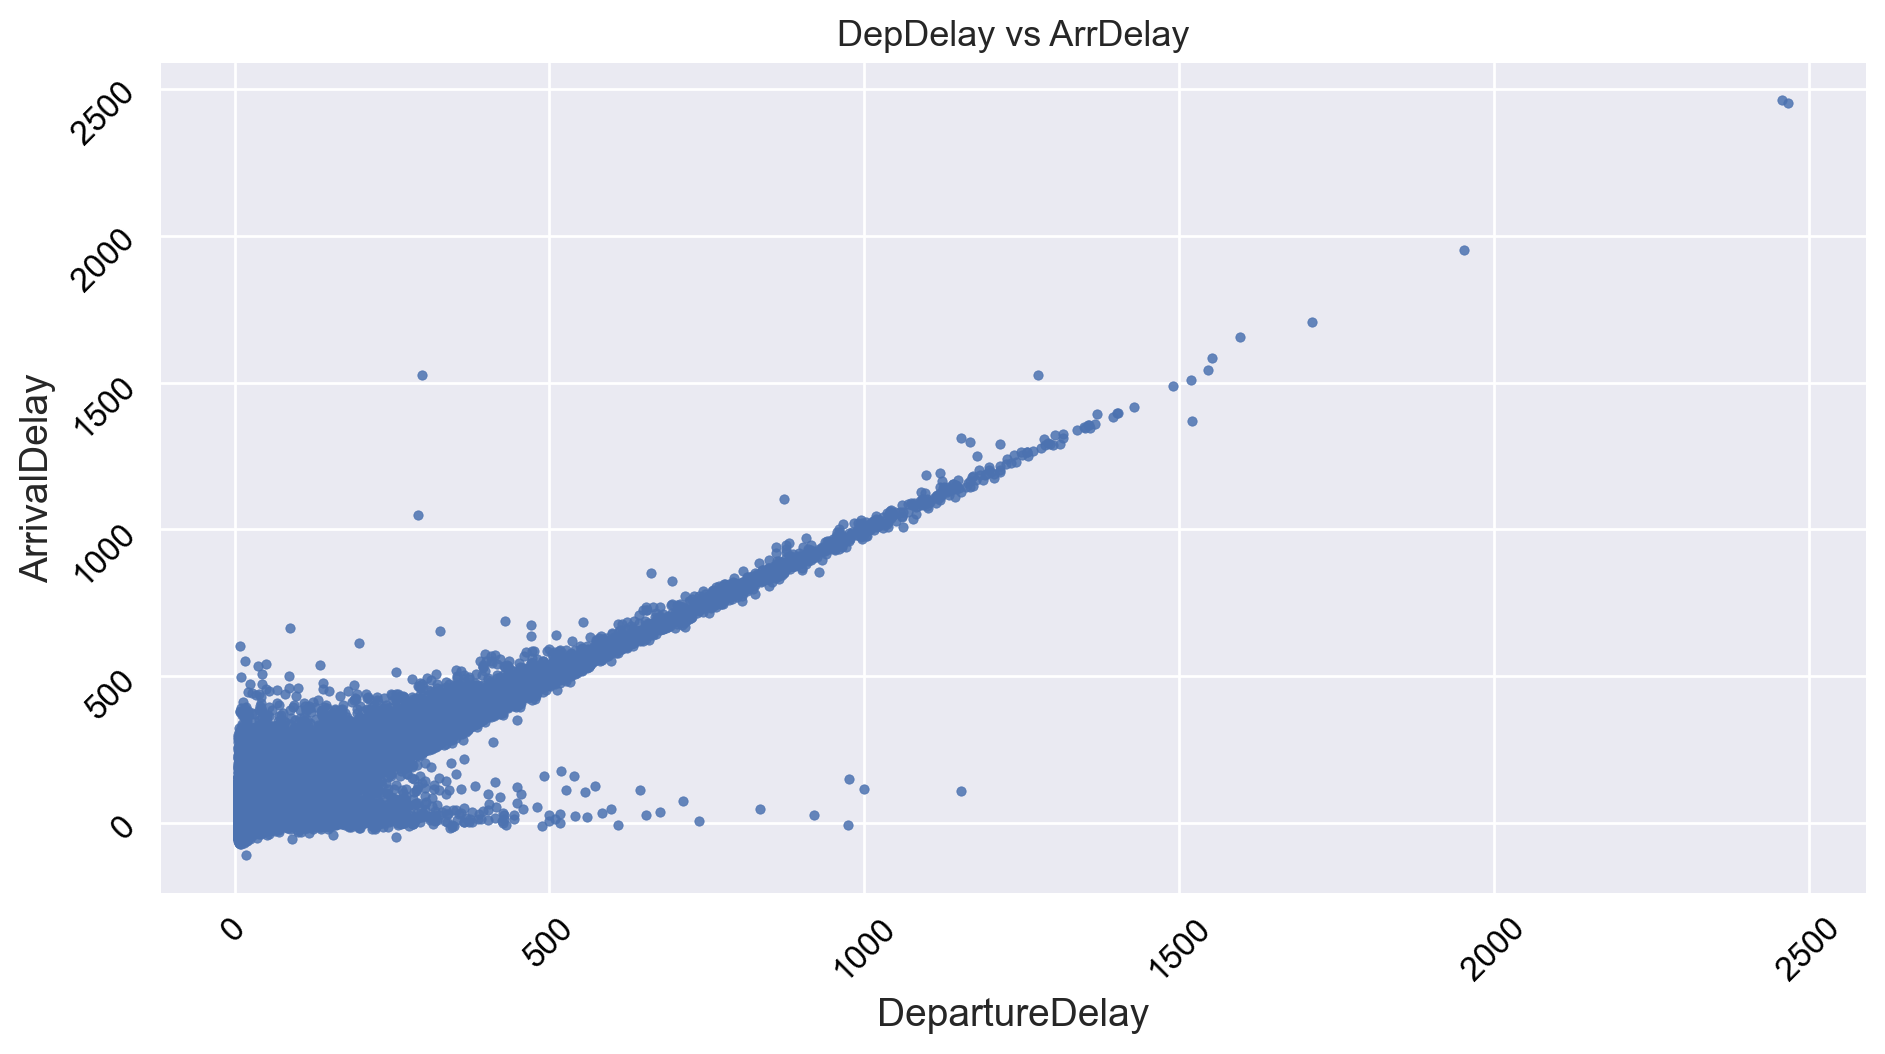

In [35]:
# Gráfico DepDelay vs ArrDelay:

# Variables
depdelay = df['DepDelay'] # retrasos del vuelo
arrdelay = df['ArrDelay']

# StylePlot
plt.style.use('seaborn')

### Figure
fig, axs = plt.subplots(figsize=(11, 5.5), dpi=200)
# Plot
axs.scatter(depdelay,arrdelay, marker='.', s=45, alpha=.85)

### Customize
axs.grid(b=True)
axs.set_title('DepDelay vs ArrDelay', fontsize = 13)
axs.set_xlabel('DepartureDelay', fontsize = 14)
axs.set_ylabel('ArrivalDelay', fontsize = 14)
axs.tick_params(axis='both',labelsize= 12, rotation=45, labelcolor='k');

+ Como era de esperar, se puede observar en el siguiente gráfico la relación lineal positiva entre DepartureDelay y ArrivalDelay. Por lo tanto: 
    1. Los vuelos con retraso en la salida tienden a llegar con retraso.
    2. Algunos vuelos que salen con retraso no tienen porqué llegar con retraso: Esto se podría explicar según la distancia de vuelo.
    3. Algunos vuelos no salen con retraso pero sí llegan después de la hora programada.

### DAYS WITH MOST FLIGHTS

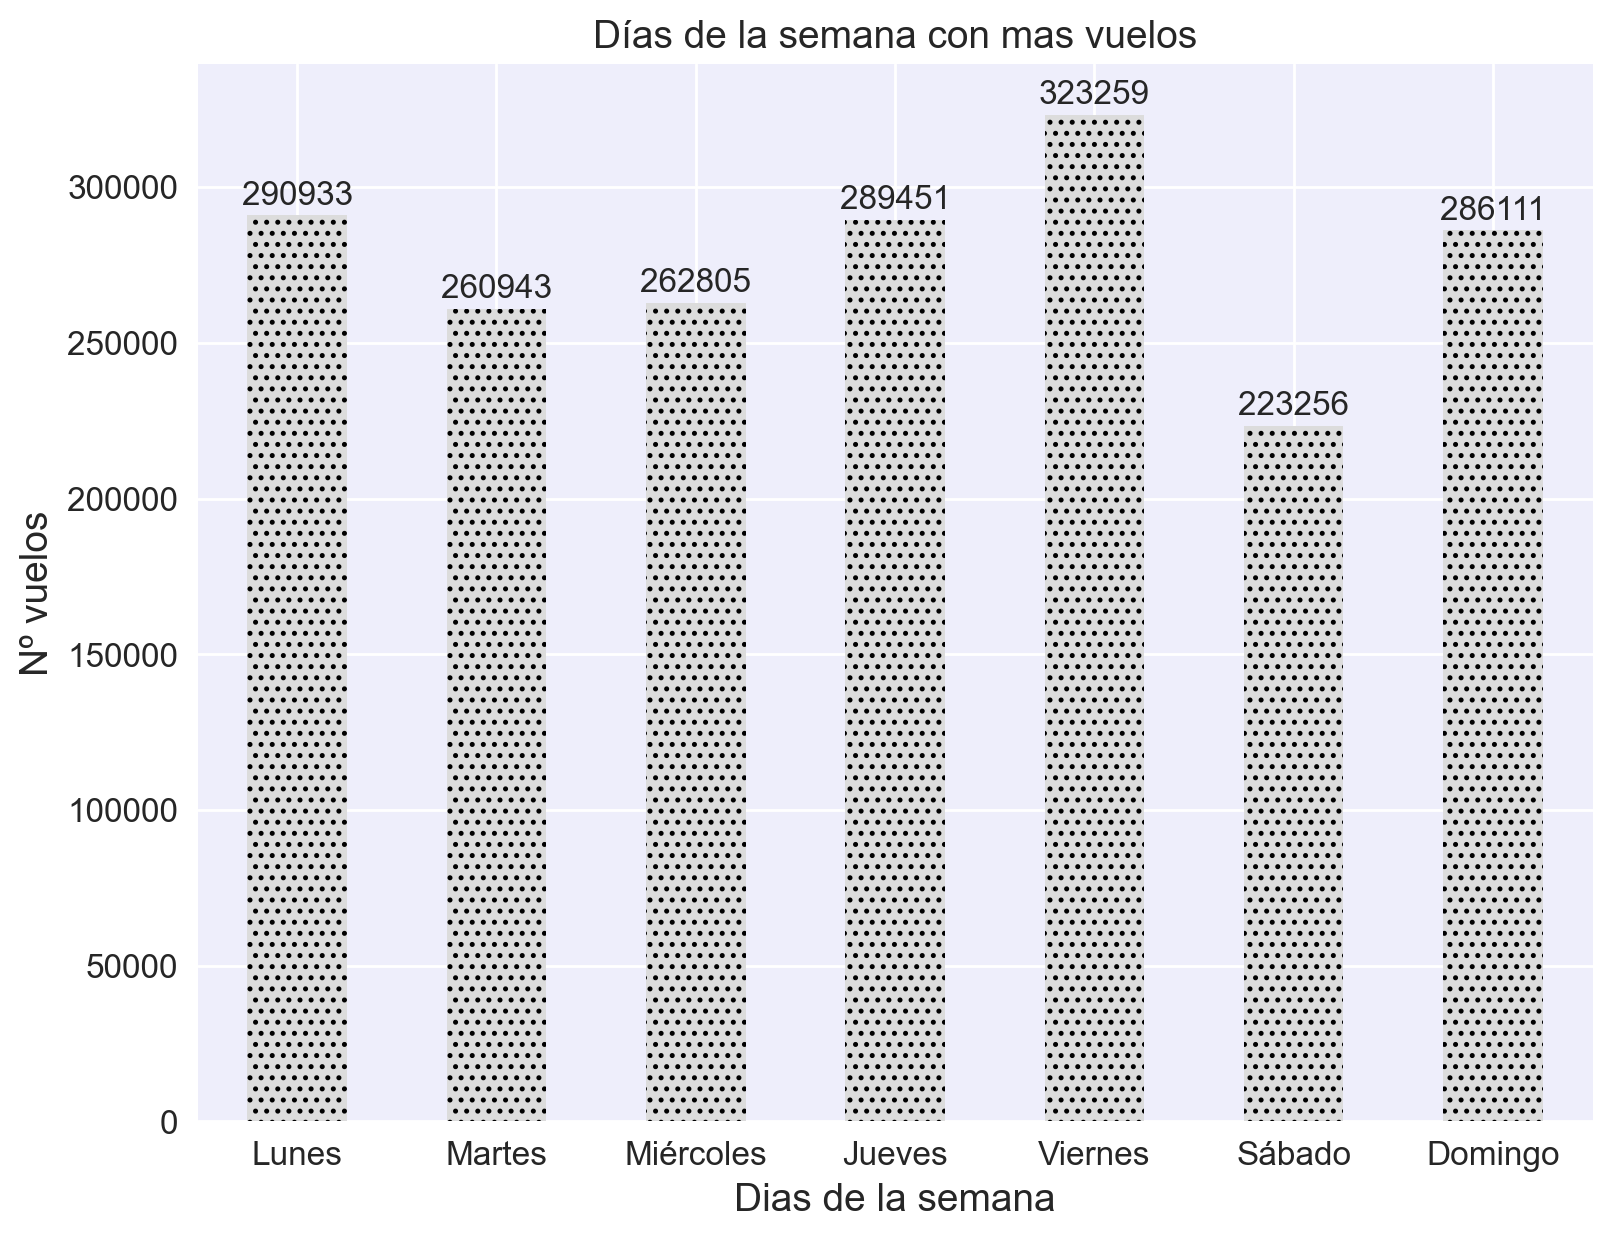

In [36]:
# Dias de la semana con más vuelos:

# Variables
dayweek = df['DayOfWeek'].value_counts().sort_index()
percent = (dayweek/len(df['DayOfWeek']))*100 # Porcentaje de los vuelos por semana
dayweek.index = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

### Figure
fig = plt.figure(figsize =(9, 7), dpi=200)

# Background
ax = fig.add_subplot(111)
ax.patch.set(facecolor='lavender', alpha=.65)

# Plot
plots = dayweek.plot.bar(fontsize = 12, width=0.5, hatch='...', color='gainsboro')

for bar in plots.patches: # anotation
    plots.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width()/2, bar.get_height()),
                   ha='center', va='center', size=12, xytext=(0, 7), textcoords='offset points')

### Customize plot
plt.title('Días de la semana con mas vuelos', loc='center', fontsize=14)
plt.xlabel('Dias de la semana', loc='center', fontsize=14)
plt.ylabel('Nº vuelos', loc='center', fontsize=14)
plt.xticks(rotation=0);

1. Viernes, lunes y jueves son los días de la semana con más viajes acumulados. Los viernes se podría explicar por un cúmulo de viajes de negocios/turismo/ocio/familiar. Lunes y jueves principalmente por viajes de negocios.   


2. Mientras que sábado, miércoles y martes son los días de la semana con menos tráfico aéreo, ideales para viajar sin mucha movilidad en el aeropuerto.

## Exercici_3
---

In [10]:
# Save dataset to excel file.

df[:5000].to_excel('delay.xlsx', index=False)

## S04_T01_Exercici_3
---

Exercici del S05 T03

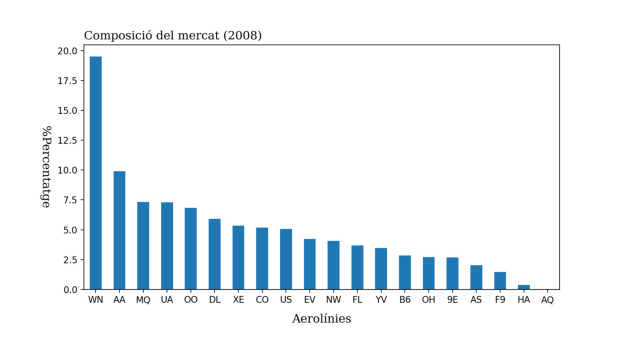

In [59]:
import matplotlib.image as mpimg

plot1 = mpimg.imread('plot1.jpg')
#plt.figure(facecolor=None, edgecolor=None)
fig = plt.figure(figsize =(11, 11))
plt.axis('off')
plt.grid(b=False)
plt.imshow(plot1);

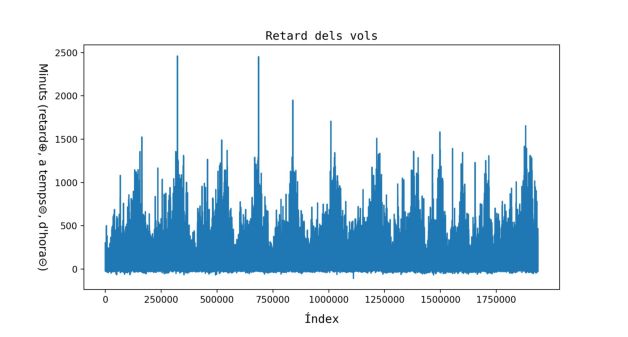

In [60]:
plot2 = mpimg.imread('plot2.jpg')
fig = plt.figure(figsize =(11, 11))
plt.axis('off')
plt.grid(b=False)
plt.imshow(plot2);

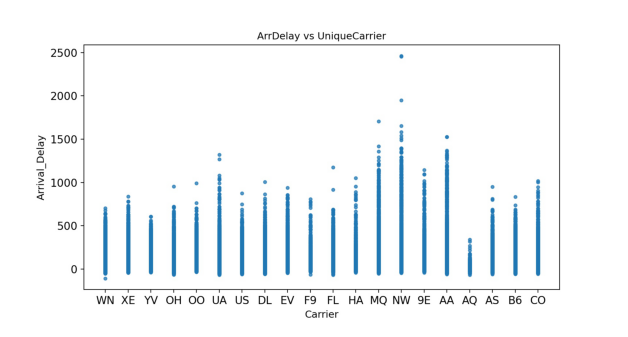

In [61]:
plot3 = mpimg.imread('plot3.jpg')
fig = plt.figure(figsize =(11, 11))
plt.axis('off')
plt.grid(b=False)
plt.imshow(plot3);

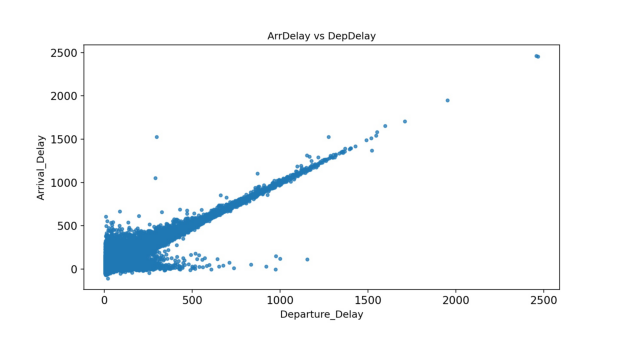

In [62]:
plot4 = mpimg.imread('plot4.jpg')
fig = plt.figure(figsize =(11, 11))
plt.axis('off')
plt.grid(b=False)
plt.imshow(plot4);

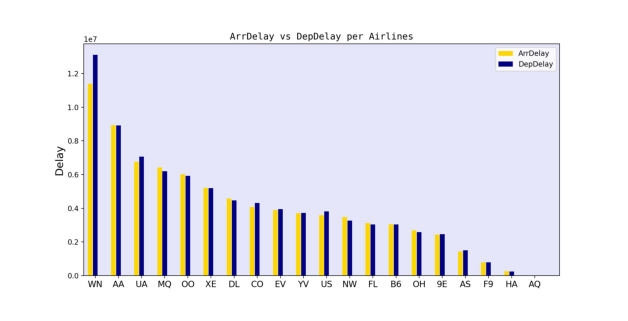

In [63]:
plot5 = mpimg.imread('plot5.jpg')
fig = plt.figure(figsize =(11, 11))
plt.axis('off')
plt.grid(b=False)
plt.imshow(plot5);

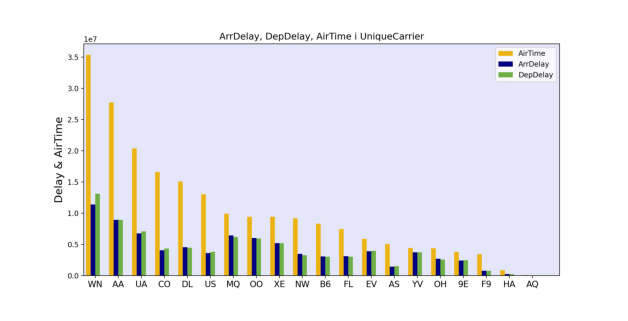

In [68]:
plot6 = mpimg.imread('plot6.jpg')
fig = plt.figure(figsize =(11, 11))
plt.axis('off')
plt.grid(b=False)
plt.imshow(plot6);